# Counting Sort

## Importando bibliotecas

In [1]:
import numpy as np
from time import perf_counter
from pandas import DataFrame
from seaborn import pointplot, set_style

# Constante
LISTA_DE_TAMANHOS = np.array([1000, 2000, 3000,
                              4000, 5000, 8000,
                              11_000, 15_000])

## Algoritmo

In [2]:
def count(arr:'np.ndarray[int]'):
  """
  O algoritmo leva em consideração que os elementos do array são
  inteiros.
  """
  copia = arr.copy()
  minimo, maximo = arr.min(), arr.max()
  counts = np.zeros(maximo - minimo + 1, dtype=int)

  for element in arr:
    counts[element - minimo] += 1
  
  for i in range(1, len(counts)):
    counts[i] += counts[i-1]
  
  for e in copia:
    arr[counts[e - minimo] - 1] = e
    counts[e - minimo] -= 1

## Bateria de testes de desempenho

In [5]:
data = dict()

for ordem in ['crescente', 'aleatoria', 'decrescente']:
  tempos = list()
  for tamanho in LISTA_DE_TAMANHOS:
    # Gerando amostra do teste
    if ordem == 'crescente':
      amostra = np.arange(tamanho, dtype=int)
    elif ordem == 'decrescente':
      amostra = np.arange(tamanho, dtype=int)[::-1].copy()
    else:
      amostra = np.random.randint(low=0, high=tamanho+1, size=tamanho)
    
    # testando performance
    start = perf_counter()
    count(amostra)
    stop = perf_counter()
    
    # salvando resultado
    tempos.append(stop - start)
  data[ordem] = tempos
data['tamanhos'] = LISTA_DE_TAMANHOS

df = DataFrame(data=data)
df.style.hide_index()

crescente,aleatoria,decrescente,tamanhos
0.005707,0.003043,0.002725,1000
0.010140,0.009311,0.005718,2000
0.015577,0.008890,0.007633,3000
0.020981,0.020339,0.011313,4000
0.025445,0.019798,0.014293,5000
0.046856,0.022154,0.021587,8000
0.046230,0.037474,0.031802,11000
0.042849,0.047457,0.043117,15000


## Resultados

O pior caso é quando a lista se encontra ordenada de forma aleatoria


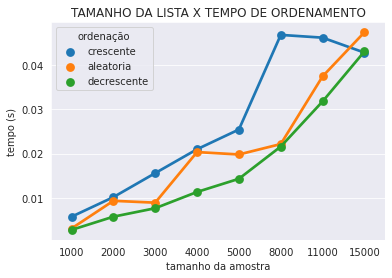

In [6]:
# Remodela o dataframe para uma versão longa mais fácil de plotar
long_df = df.melt(id_vars='tamanhos', var_name='ordenação', value_name='tempos')

set_style('darkgrid')
pointplot(
  data=long_df,
  x='tamanhos',
  y='tempos',
  hue='ordenação',
  ).set(
    xlabel='tamanho da amostra',
    ylabel='tempo (s)',
    title='TAMANHO DA LISTA X TEMPO DE ORDENAMENTO')

ordem = long_df.sort_values(by='tempos', ascending=False)['ordenação'].values[0]
print(f'O pior caso é quando a lista se encontra ordenada de forma {ordem}')